<a href="https://colab.research.google.com/github/santhimaddipudi/ML_Handson/blob/main/Statistics_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [ ]:
forbes_data=pd.read_csv("/content/sample_data/forbes.csv")
forbes_data.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [ ]:
forbes_data.isnull().sum()

Rank              0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

##drop null values

In [ ]:
forbes_data.dropna(inplace=True)
forbes_data.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

In [ ]:
forbes_data.shape

(1508, 9)

##calculate measures of central tendency

In [ ]:
market_value_mean=forbes_data['Market Value'].mean()
market_value_mean

26.978494031830238

In [ ]:
market_value_median=forbes_data['Market Value'].median()
market_value_median

13.1

In [ ]:
diff_mean_med=market_value_mean-market_value_median
diff_mean_med

13.878494031830238

In [ ]:
forbes_data['Sector'].value_counts()

Sector
Financials                    474
Consumer Discretionary        209
Industrials                   192
Materials                     145
Consumer Staples              106
Information Technology        103
Utilities                      86
Energy                         79
Health Care                    71
Telecommunication Services     43
Name: count, dtype: int64

In [ ]:
sector_mode=forbes_data['Sector'].mode()
sector_mode

0    Financials
Name: Sector, dtype: object

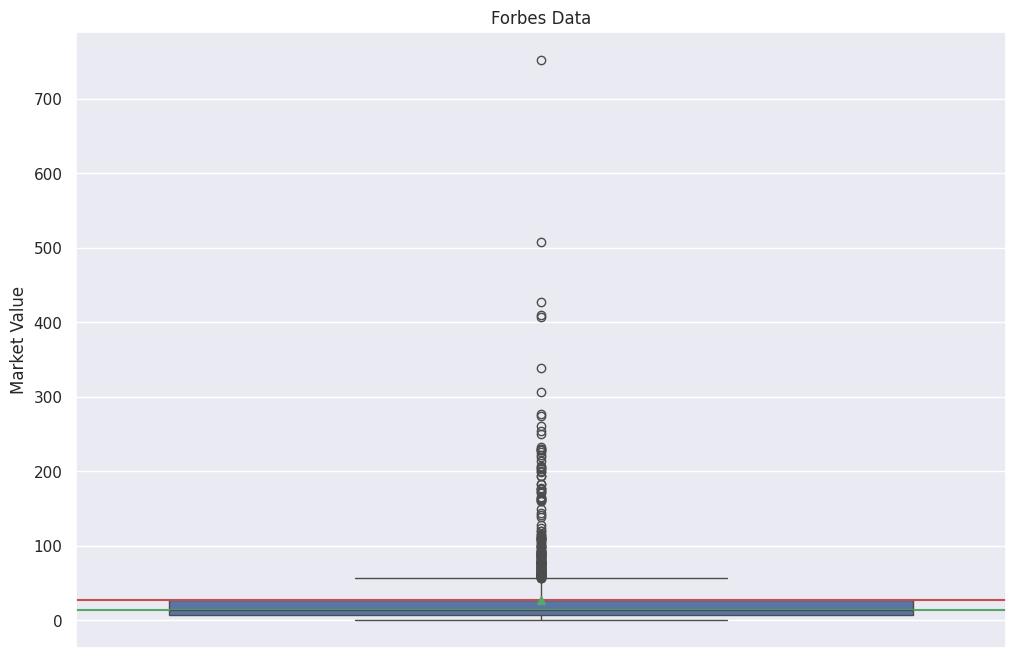

In [17]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_median, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

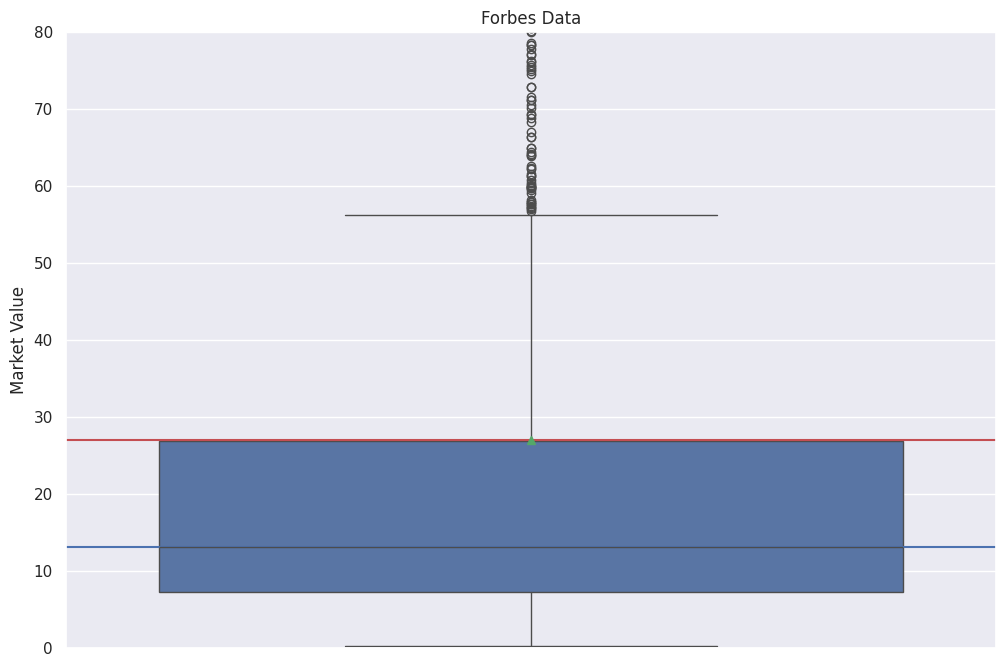

In [18]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

plt.ylim(0, 80)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_median, color='b', linestyle='-')

plt.title('Forbes Data')
plt.show()

##calculate measures of dispersion

In [21]:
prof_max=forbes_data['Profits'].max()
prof_max

45.2

In [23]:
prof_min=forbes_data['Profits'].min()
prof_min

-13.0

In [25]:
prof_range=prof_max-prof_min
prof_range

58.2

####see the outliers in profit range

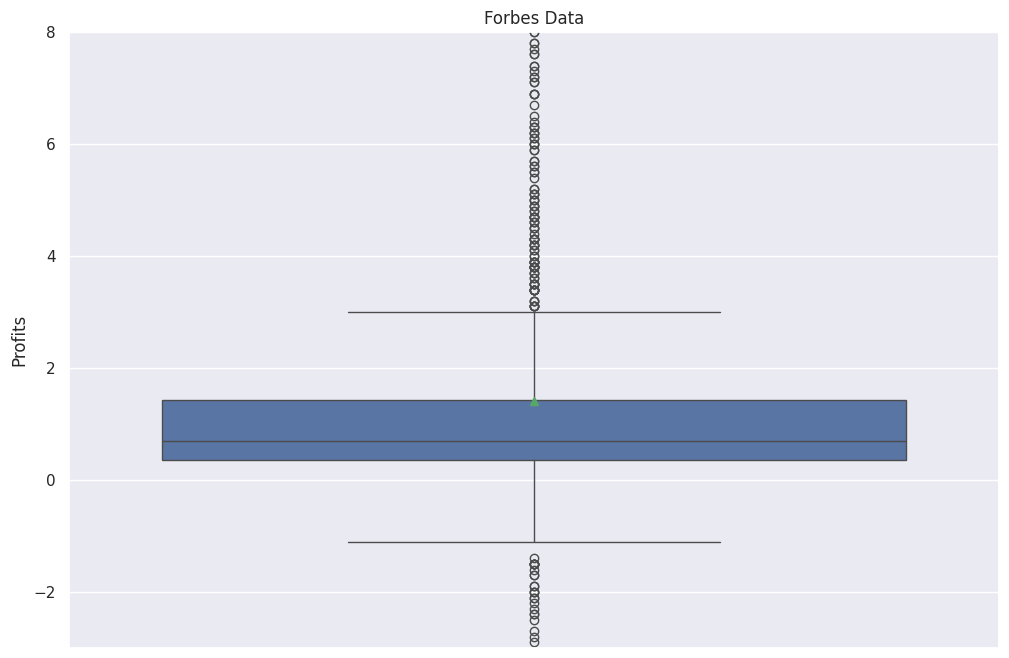

In [27]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Profits', showmeans=True)

plt.title('Forbes Data')
plt.ylim(-3,8)
plt.show()

##IQR

In [28]:
Q1=np.quantile(forbes_data['Profits'],0.25)
Q1

0.34975

In [29]:
Q3=np.quantile(forbes_data['Profits'],0.75)
Q3

1.4249999999999998

In [30]:
IQR=Q3-Q1
IQR

1.0752499999999998

In [33]:
prof_std=forbes_data['Profits'].std()
prof_std

3.244201278603241

In [34]:
prof_var=prof_std**2
prof_var

10.524841936090903

In [35]:
#same as above
prof_var=forbes_data['Profits'].var()
prof_var

10.524841936090903

In [37]:
forbes_data.describe()

,Rank,Sales,Profits,Assets,Market Value
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,909.135279,19.623046,1.407430,97.647016,26.978494
std,554.044456,30.875809,3.244201,287.036157,47.099541
min,1.000000,0.001000,-13.000000,1.300000,0.240000
25%,433.750000,4.900000,0.349750,12.800000,7.300000
50%,883.500000,10.300000,0.692500,25.900000,13.100000
75%,1354.250000,19.900000,1.425000,60.325000,26.900000
max,1999.000000,485.300000,45.200000,3473.200000,752.000000
